<a href="https://colab.research.google.com/github/CarlosOliveri/Detector-de-chapas/blob/master/Detector_Chapas_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-245-g3d8f004 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [ ]:
%cd /content/
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
drive.mount('/content/drive')

/content
Mounted at /content/drive


In [ ]:
!python3 -m pip install paddlepaddle-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.5/542.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00


In [ ]:
!pip install "paddleocr>=2.0.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.7/465.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.5/398.5 kB 47.3 M

In [ ]:
from paddleocr import PaddleOCR,draw_ocr
ocr = PaddleOCR(use_angle_cls=True,lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:16<00:00, 242kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:18<00:00, 557kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:07<00:00, 306kiB/s]

[2023/11/21 13:51:22] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
%cd /content/
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom',path='/content/drive/MyDrive/Yolov5/best.pt', force_reload=True, trust_repo=True)  # or yolov5n - yolov5x6 or custom
#im = cv2.imread('/content/Screem_Cam_Fiuna.png')
#im = '/content/0cacb08195a3e2d7.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
#results = model(im)  # inference
#results.crop()  # or .show(), .save(), .crop(), .pandas(), etc.

/content


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-245-g3d8f004 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


In [ ]:
im = cv2.imread('/content/Screem_Cam_Fiuna_2.png')
results = model(im)  # inference

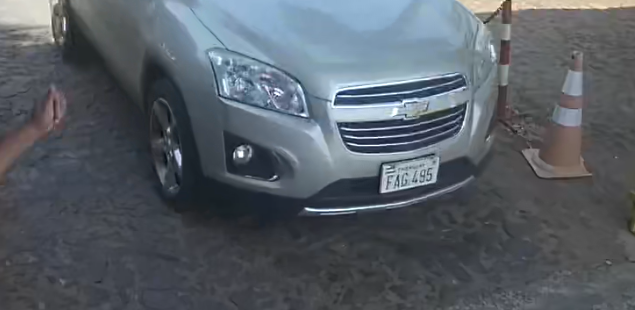

In [ ]:
tamaño = im.shape
y = int(tamaño[0]/3)
x = int(tamaño[1]/3)
y1 =250
y2 = 560
x1 = 450
x2 = 1085
cv2_imshow(im[y1:y2,x1:x2])

In [ ]:
tamaño[0]

625

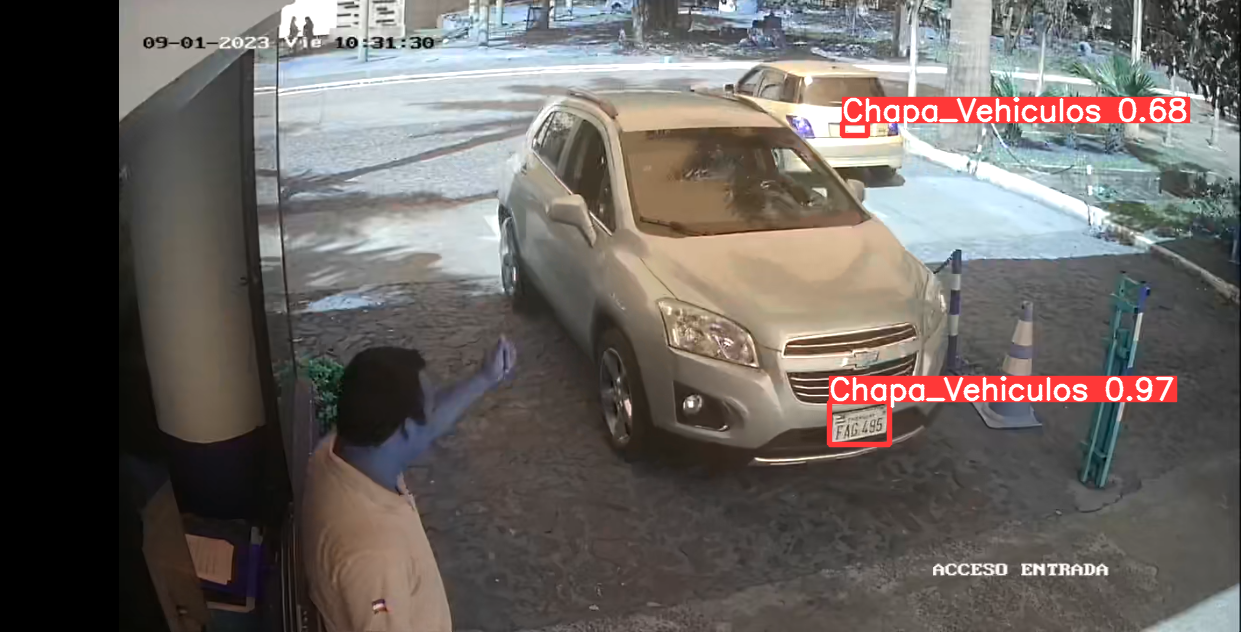

In [ ]:
results.show()

In [ ]:
crop = results.crop(save = False)

In [ ]:
crop[0]

{'box': [tensor(842.92041, device='cuda:0'),
  tensor(122.46529, device='cuda:0'),
  tensor(867.35815, device='cuda:0'),
  tensor(135.22502, device='cuda:0')],
 'conf': tensor(0.67925, device='cuda:0'),
 'cls': tensor(0., device='cuda:0'),
 'label': 'Chapa_Vehiculos 0.68',
 'im': array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [101, 101, 255],
         [ 56,  56, 255],
         [ 56,  56, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [101, 101, 255],
         [ 56,  56, 255],
         [ 56,  56, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [101, 101, 255],
         [ 56,  56, 255],
         [ 56,  56, 255]],
 
        ...,
 
        [[165, 188, 190],
         [166, 190, 191],
         [172, 196, 197],
         ...,
         [211, 249, 255],
         [214, 254, 255],
         [213, 255, 255]],
 
        [[247

In [ ]:
conf = 90
bbox = 0
for k in crop:
  if k['conf']>0.9:
    bbox=k

In [ ]:
coor = bbox['box']
coor

[tensor(829.35388, device='cuda:0'),
 tensor(401.33444, device='cuda:0'),
 tensor(889.65515, device='cuda:0'),
 tensor(444.25574, device='cuda:0')]

In [ ]:
cropx1 = round(coor[0].detach().cpu().numpy()+0)
cropy1 =  round(coor[1].detach().cpu().numpy()+0)
cropx2 = round(coor[2].detach().cpu().numpy()+0)
cropy2 = round(coor[3].detach().cpu().numpy()+0)
cropx1,cropy1,cropx2,cropy2

(829, 401, 890, 444)

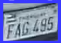

In [ ]:
#from re import X
#ima = cv2.imread(im)
placa = im[cropy1:cropy2,cropx1:cropx2]
cv2_imshow(placa)


In [ ]:
deteccion = cv2.imread('/content/runs/detect/exp/crops/Chapa_Vehiculos/image0.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(deteccion)

AttributeError: ignored

In [ ]:
result = ocr.ocr(placa,cls=True)

[2023/11/21 14:05:30] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.11681365966796875
[2023/11/21 14:05:31] ppocr DEBUG: cls num  : 1, elapsed : 0.7107925415039062
[2023/11/21 14:05:31] ppocr DEBUG: rec_res num  : 1, elapsed : 0.07104063034057617


In [ ]:
result

[[[[[2.0, 10.0], [56.0, 5.0], [58.0, 38.0], [4.0, 42.0]],
   ('FAG.485', 0.8315778374671936)]]]

In [ ]:
chapa = result[0][0][1][0]
chapa

'FAG.485'

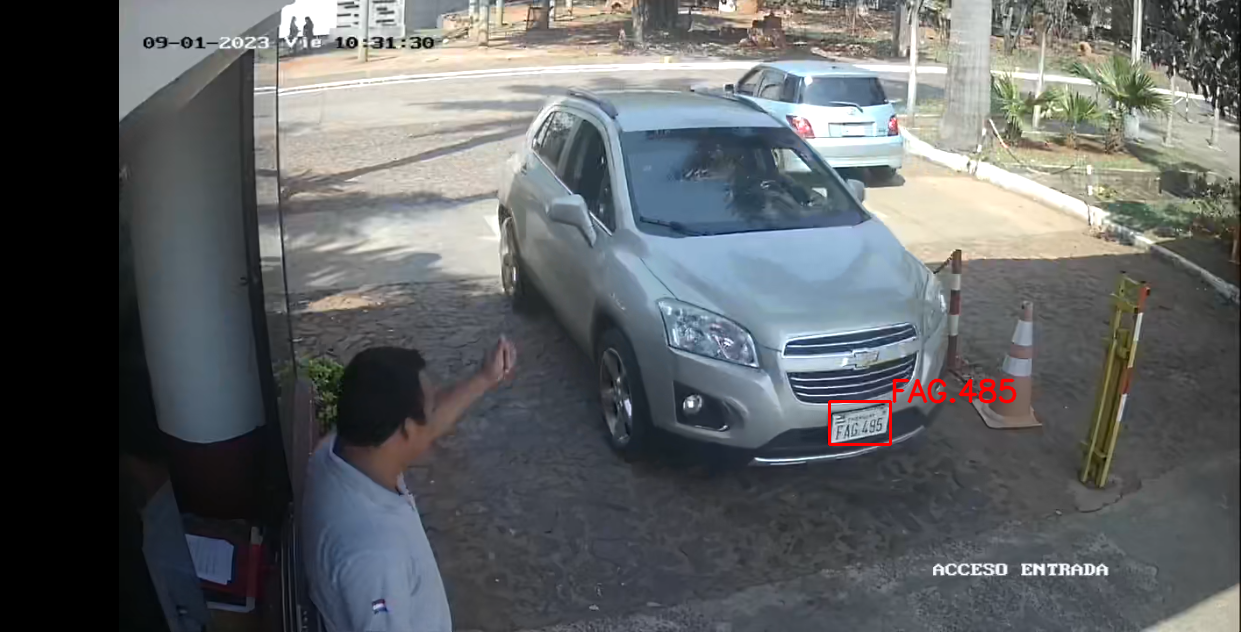

In [ ]:
im = cv2.imread('/content/Screem_Cam_Fiuna_2.png')
image_rect = cv2.rectangle(im,(cropx1,cropy1),(cropx2,cropy2),(0,0,255),2)
font = cv2.FONT_HERSHEY_SIMPLEX
org = (50, 50)
fontScale = 1
color = (0, 0, 255)
thickness = 2
ima = cv2.putText(image_rect, chapa, (cropx2,cropy1), font,
                   fontScale, color, thickness, cv2.LINE_AA)
cv2_imshow(ima)

Inferencia en video